In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


In [3]:
# from tensorflow import datasets

In [4]:
print(tf.__version__)

2.18.0


Download the flowers dataset
This tutorial uses a dataset of several thousand photos of flowers. The flowers dataset contains five sub-directories, one per class:

In [5]:
# flowers_photos/
#   daisy/
#   dandelion/
#   roses/
#   sunflowers/
#   tulips/

In [6]:
import pathlib

In [7]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [8]:
os.getcwd()

'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess'

In [9]:
# archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)

archive = tf.keras.utils.get_file(
    # filename=,
    origin=dataset_url,
    # cache_subdir='models',
    # hash_function='auto',
    extract=True,
    # archive_format='auto',
    cache_dir=os.getcwd()
)

In [10]:
data_dir = pathlib.Path(archive).with_suffix('')

In [11]:
data_dir

WindowsPath('d:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos')

data_dir.glob('*/*.jpg') uses the glob method from the pathlib module to find files recursively.

lob Patterns
*: Matches any characters (except /) in a directory level.
**: Matches any characters (including /) recursively.
?.jpg: Matches files with a single character before the .jpg extension.
Common Glob Patterns
*.jpg: Files with .jpg extension in the current directory.
*/*.jpg: Files with .jpg extension in subdirectories.
**/*.jpg: Files with .jpg extension in the current directory and subdirectories recursively.

In [12]:
import glob

In [13]:
# */*.jpg: A glob pattern matching all .jpg files within subdirectories of data_dir.
image_count = len(list(glob.glob(f'{data_dir}' + '*\*.jpg')))
print(image_count)

0


In [14]:
import glob

# Specify the directory path
root_dir = r'd:\a27_YEARS_OLD\deep_learning\load_preprocess\datasets\flower_photos.tgz\flower_photos'

count = 0
# Iterate through subdirectories
for subdir in ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']:
    dir_path = f'{root_dir}\{subdir}'
    
    # Use glob to find all .jpg files
    jpg_files = glob.glob(dir_path + '\*.jpg')
    
    # Count the number of .jpg files
    count += len(jpg_files)
    
    print(f'{subdir}: {count} .jpg files')

print(count)

daisy: 633 .jpg files
dandelion: 1531 .jpg files
roses: 2172 .jpg files
sunflowers: 2871 .jpg files
tulips: 3670 .jpg files
3670


In [110]:
jpg_files

['d:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\tulips\\100930342_92e8746431_n.jpg',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\tulips\\10094729603_eeca3f2cb6.jpg',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\tulips\\10094731133_94a942463c.jpg',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\tulips\\10128546863_8de70c610d.jpg',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\tulips\\10163955604_ae0b830975_n.jpg',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\tulips\\10164073235_f29931d91e.jpg',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\tulips\\10686568196_b1915544a8.jpg',
 'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\dataset

In [15]:
import os

root_dir = r'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos'
jpg_count = 0
for subdir in os.listdir(root_dir):
    dir_path = os.path.join(root_dir, subdir)
    
    if os.path.isdir(dir_path):
        jpg_count += sum(1 for file in os.listdir(dir_path) if file.endswith('.jpg'))
        print(f'{subdir}: {jpg_count} .jpg files')

print(jpg_count)

daisy: 633 .jpg files
dandelion: 1531 .jpg files
roses: 2172 .jpg files
sunflowers: 2871 .jpg files
tulips: 3670 .jpg files
3670


In [16]:
roses = list(glob.glob(dir_path + '\*.jpg'))


In [17]:
roses

['d:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\tulips\\100930342_92e8746431_n.jpg',
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\tulips\\10094729603_eeca3f2cb6.jpg',
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\tulips\\10094731133_94a942463c.jpg',
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\tulips\\10128546863_8de70c610d.jpg',
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\tulips\\10163955604_ae0b830975_n.jpg',
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\tulips\\10164073235_f29931d91e.jpg',
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\tulips\\10686568196_b1915544a8.jpg',
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\tulips\\107

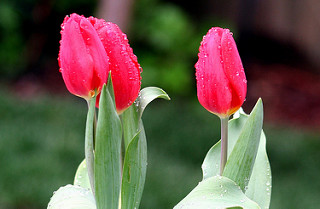

In [18]:
PIL.Image.open(str(roses[0]))

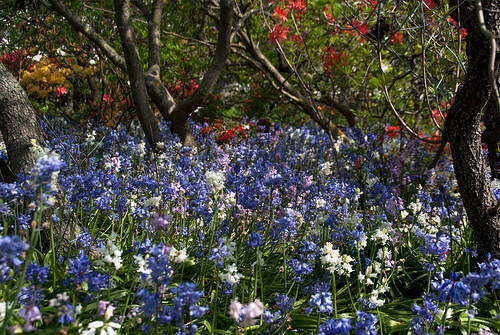

In [19]:
PIL.Image.open(str(roses[1]))

Load data using a Keras utility
Let's load these images off disk using the helpful tf.keras.utils.image_dataset_from_directory utility.

Create a dataset

Create a dataset
Define some parameters for the loader:

In [20]:
batch_size = 32
img_height = 180
img_width = 180
# dimension (32, 180,180, 3) 3 for rgb

Reproducibility: By setting a fixed seed, you ensure that the random numbers generated during training are the same every time you run the code. This helps in debugging, testing, and comparing different models.
Determinism: Seed values guarantee that the initial weights, dropout masks, and other random operations are identical across runs.
Where is seed used in Keras?
Weight initialization: Random weight initialization uses the seed.
Dropout: Random dropout masks are generated using the seed.
Random operations: Other random operations, like random cropping, flipping, or

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  root_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  root_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


train_ds.take(1) retrieves the first element from the train_ds dataset.
Explanation
Dataset slicing: take(1) extracts the first element (a batch of data) from the dataset.
Batch retrieval: Returns a single batch containing one or more samples, depending on the dataset's batch size.

In [24]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
# Create a sample dataset
train_ds_demo = tf.data.Dataset.from_tensor_slices(([1, 2], [3, 4], [5, 6]))

# Retrieve the first element (batch)
first_batch = train_ds_demo.take(1)

In [26]:
first_batch

<_TakeDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

take(n): Retrieves the first n elements.
skip(n): Skips the first n elements.

In [27]:
# Print the first batch
for element in first_batch:
    print(element)
   

(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=5>)


In [28]:
image_batch, labels_batch = next(iter(train_ds))

In [29]:
image_batch[0] # first batch

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 25

In [30]:
image_batch[0] #first batch first image
# image_batch[0][0].shape #first batch first image shape

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 25

In [31]:
print(np.min(image_batch[0]), np.max(image_batch[0]))

0.0 255.0


In [32]:
for images, labels in train_ds.take(1): # take the first 32 images in first batch
    print(images)
    # print(images[0])
    # print(images[0].numpy())
    # print(images[0].numpy().astype('uint8'))
    # print(labels)
    

tf.Tensor(
[[[[8.83888855e+01 1.24388885e+02 2.00388885e+02]
   [8.89277802e+01 1.24927780e+02 2.00927780e+02]
   [8.88342590e+01 1.25369446e+02 1.99212967e+02]
   ...
   [2.14580017e+02 8.65392227e+01 2.93608099e-01]
   [2.33405533e+02 1.02674973e+02 5.17222071e+00]
   [2.28703690e+02 9.76851730e+01 2.50831127e+00]]

  [[9.02777786e+01 1.26277779e+02 2.02277786e+02]
   [9.08666611e+01 1.27150002e+02 2.03008331e+02]
   [9.50527802e+01 1.33036102e+02 2.06155548e+02]
   ...
   [1.61444641e+02 6.94110336e+01 9.16383362e+00]
   [1.72708313e+02 6.47249908e+01 1.37494326e+00]
   [1.53869415e+02 6.37055588e+01 4.15557909e+00]]

  [[9.30277786e+01 1.31027786e+02 2.06027786e+02]
   [9.27500000e+01 1.30819443e+02 2.05819443e+02]
   [9.83518524e+01 1.37162033e+02 2.09879623e+02]
   ...
   [1.18514069e+02 5.96759567e+01 8.26373959e+00]
   [1.67694916e+02 1.02569954e+02 4.29171982e+01]
   [2.26222305e+02 1.90916809e+02 1.68245605e+02]]

  ...

  [[8.00000458e+01 1.02430565e+02 3.50880051e+01]
   [8

Visualize the data
Here are the first nine images from the training dataset.

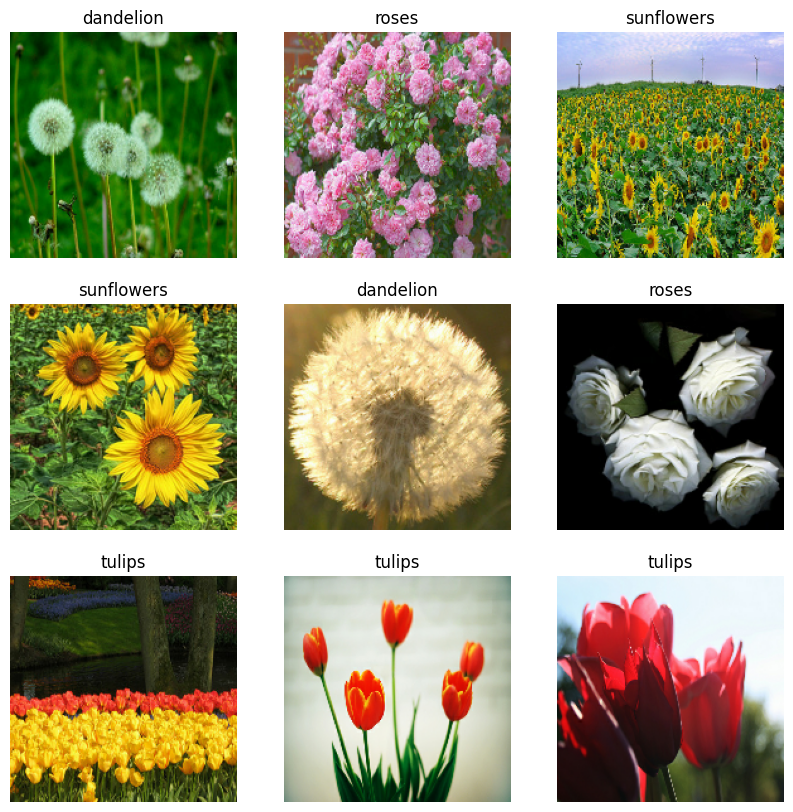

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9): # plot first 10 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

You can call .numpy() on either of these tensors to convert them to a numpy.ndarray.

Standardize the data
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling:

In [35]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [36]:
normalization_layer

<Rescaling name=rescaling, built=False>

There are two ways to use this layer. You can apply it to the dataset by calling Dataset.map:

In [37]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [38]:
normalized_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
image_batch, labels_batch = next(iter(normalized_ds))

In [40]:
image_batch[0] # first image in batch first batch

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.98956436, 0.9856428 , 0.90554476],
        [0.9903269 , 0.9864053 , 0.91248375],
        [0.9910785 , 0.9871569 , 0.91323537]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.992756  , 0.98871464, 0.9037255 ],
        [0.99702615, 0.99013066, 0.9037255 ],
        [0.9978432 , 0.99252737, 0.9023313 ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.9921569 , 0.9843138 , 0.89760363],
        [0.9911764 , 0.98267967, 0.89182997],
        [0.99422675, 0.9863836 , 0.8961875 ]],

       ...,

       [[0.3261438 , 0.29395428, 0.10718954],
        [0.14

In [41]:
first_image = image_batch[0]

In [42]:
print(np.min(first_image), np.max(first_image))

0.0 1.0


Or, you can include the layer inside your model definition to simplify deployment. You will use the second approach here.

Note: If you would like to scale pixel values to [-1,1] you can instead write tf.keras.layers.Rescaling(1./127.5, offset=-1)

If you want to include the resizing logic in your model as well, you can use the tf.keras.layers.Resizing layer.

Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
Dataset.prefetch overlaps data preprocessing and model execution while training.

In [43]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

The Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). This model has not been tuned in any way

In [44]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'), # 3x3 32 no of filters
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.summary() # mo input shape is given so no output shape is determined

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

In [46]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [47]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 68s 645ms/step - accuracy: 0.3916 - loss: 1.3901 - val_accuracy: 0.5681 - val_loss: 1.1174
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 327ms/step - accuracy: 0.6054 - loss: 0.9984 - val_accuracy: 0.6158 - val_loss: 1.0097
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 283ms/step - accuracy: 0.6918 - loss: 0.8278 - val_accuracy: 0.6172 - val_loss: 1.0106


In [129]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,975,697 (18.98 MB)

 Trainable params: 1,658,565 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,317,132 (12.65 MB)

You may notice the validation accuracy is low compared to the training accuracy, indicating your model is overfitting.

Using tf.data for finer control
The above Keras preprocessing utility—tf.keras.utils.image_dataset_from_directory—is a convenient way to create a tf.data.Dataset from a directory of images.

For finer grain control, you can write your own input pipeline using tf.data. This section shows how to do just that, beginning with the file paths from the TGZ file you downloaded earlier.

### manually

In [58]:
list_ds = tf.data.Dataset.list_files(str(root_dir+ "/" + '*/*'), shuffle=False)


root_dir: The root directory path.
'/' + '*/*': A glob pattern matching all files (*) within subdirectories (/*) of root_dir.
str(): Converts the path to a string.
.list_files(): A TensorFlow Dataset API method listing files matching the glob pattern.

In [ ]:
list_ds
# data/
# ├── class1
# │   ├── img1.jpg
# │   ├── img2.jpg
# │   └── ...
# ├── class2
# │   ├── img3.jpg
# │   ├── img4.jpg
# │   └── ...
# └── ...

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [60]:
list_ds = list_ds.shuffle(buffer_size=jpg_count, reshuffle_each_iteration=False)

In [61]:
list_ds

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [62]:
for f in list_ds.take(5):
  print(f.numpy())

b'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\daisy\\7199968650_72afc16d31_m.jpg'
b'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\roses\\4713533500_fcc295de70_n.jpg'
b'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\roses\\3560426426_1c66cb8330.jpg'
b'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\sunflowers\\5738580862_e128192f75.jpg'
b'd:\\a27_YEARS_OLD\\deep_learning\\load_preprocess\\datasets\\flower_photos.tgz\\flower_photos\\dandelion\\13897156242_dca5d93075_m.jpg'


The tree structure of the files can be used to compile a class_names list.

In [94]:
root_dir = r'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos'

In [95]:
class_names = np.array(sorted([item for item in glob.glob(f'{root_dir}' + '/*') ]))
print(class_names)

['d:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\LICENSE.txt'
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\daisy'
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\dandelion'
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\roses'
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\sunflowers'
 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos\\tulips']


In [96]:
class_names1 = [item.split('/')[-1] for item in class_names]
class_names1

['flower_photos\\LICENSE.txt',
 'flower_photos\\daisy',
 'flower_photos\\dandelion',
 'flower_photos\\roses',
 'flower_photos\\sunflowers',
 'flower_photos\\tulips']

In [99]:
class_names2 = [item.split('/')[-1] for item in class_names1 if item.split('\\\\')[-1] != "LICENSE.txt"]
class_names2

['flower_photos\\LICENSE.txt',
 'flower_photos\\daisy',
 'flower_photos\\dandelion',
 'flower_photos\\roses',
 'flower_photos\\sunflowers',
 'flower_photos\\tulips']

In [81]:
root_dir2 = pathlib.Path(root_dir)  # Convert to Path object

In [92]:
root_dir2

WindowsPath('d:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos')

In [93]:
class_names3 = np.array(sorted([item.name for item in root_dir2.glob('*') if item.name != "LICENSE.txt"]))
print(class_names3)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


Split the dataset into training and validation sets:

In [100]:
val_size = int(jpg_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [101]:
val_size

734

In [102]:
train_ds

<_SkipDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [103]:
val_ds

<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

You can print the length of each dataset as follows

In [104]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734


Write a short function that converts a file path to an (img, label) pair:

In [120]:
file_path = 'd:/a27_YEARS_OLD/deep_learning/load_preprocess/datasets/flower_photos.tgz/flower_photos'

In [112]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [130]:
# root_dir2.map(get_label)

In [114]:
# get_label(glob.glob(root_dir + '*\*'))

In [117]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [115]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

Use Dataset.map to create a dataset of image, label pairs:

In [118]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [127]:
for imag, label in train_ds.take(1):
    print(imag.shape, label)

(180, 180, 3) tf.Tensor(0, shape=(), dtype=int64)


In [131]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  0


Configure dataset for performance
To train a model with this dataset you will want the data:

To be well shuffled.
To be batched.
Batches to be available as soon as possible.
These features can be added using the tf.data API. For more details, visit the Input Pipeline Performance guide.

In [132]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

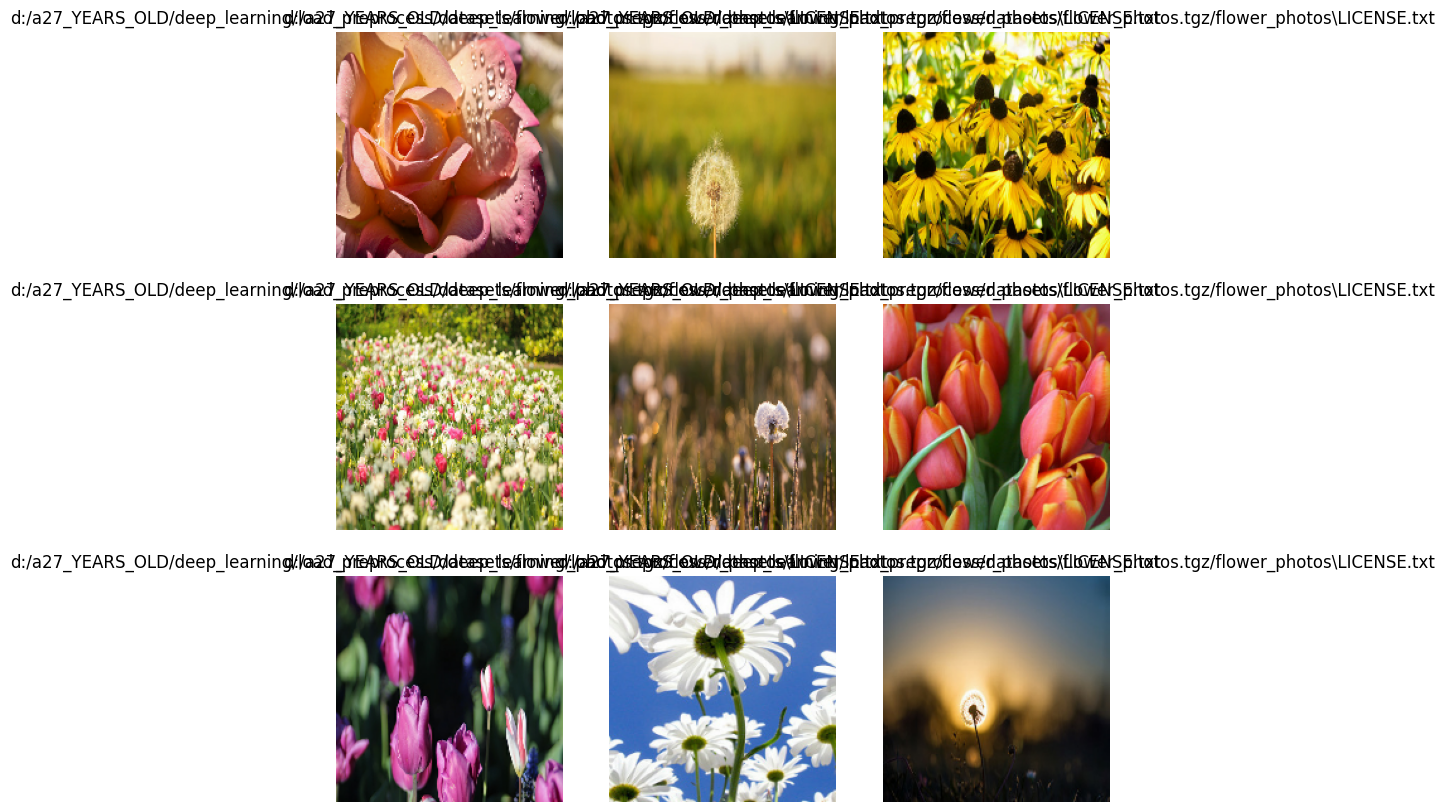

In [133]:
# Visualize the data

image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [134]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 611ms/step - accuracy: 0.9271 - loss: 0.2845 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 338ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 297ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
